Preamble: these imports are needed for this notebook to work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, clear_output
clear_output(True)

# The Game of Life and Cellular Automata

+ Cellular automata are systems where all physical laws and fields are discretized: space is a lattice, and time is discrete
+ Physical laws take the form of IF-THEN statements
+ Basic cellular automata are Markovian: given current field values at some set of lattice points, perform an update based on a set of rules


## The Game of Life

+ Conway, 1970
+ Complex dynamics emerge from simple rules
+ Markovian: next state of universe depends only on current state of universe
+ Local: next state at a lattice point depends only on current site and nearest neighbors
+ Synchronous: we update all sites at once, rather than raster scanning
+ Finite fields: A site can have values of 1 (alive) or 0 (dead)

#### Game life rules:
1. Underpopulation: Any live cell with fewer than two live neighbours dies
2. Survival: Any live cell with two or three live neighbours lives stays alive
3. Overpopulation: Any live cell with more than three live neighbours dies
3. Reproduction: Any dead cell with *exactly* three live neighbours becomes a live cell




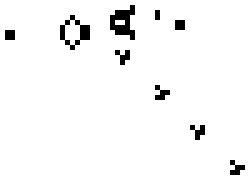

In [2]:
Image("../resources/Gospers_glider_gun.gif")
# Source: https://anchormen.nl/blog/big-data-services/pyspark-jupyter-kernels/

# Implementation (collapsed)

In [4]:
# A base allows us to impose structure on specific cases. We will use this as a parent
# for subsequent classes
class CellularAutomaton:
    """
    A base class for cellular automata. Subclasses must implement the step method.
    """
    def __init__(self, n_states, n_neighbors, initial_state):
        self.n_states = n_states
        self.n_neighbors = n_neighbors

        ## The universe is a 2D array of integers
        self.initial_state = initial_state
        self.state = initial_state

    def fetch_neighbors(self, i, j):
        """
        Return the neighbors of the cell at (i, j) with periodic boundary conditions
        """
        radius = 2 * self.n_neighbors + 1
        neighbor_vals = np.zeros((radius, radius)) # initialize to zero

        #neighbor_vals[0] = self.state[np.i - self.n_neighbors, j - self.n_neighbors:]

        if i > 0:
            above = self.state[i-1, j]
        else:
            above = self.state[-1, j]

        if i < self.state.shape[0] - 1:
            below = self.state[i+1, j]
        else:
            below = self.state[0, j]

        if j > 0:
            left = self.state[i, j-1]
        else:
            left = self.state[i, -1]

        if j < self.state.shape[1] - 1:
            right = self.state[i, j+1]
        else:
            right = self.state[i, 0]

        return np.array([above, below, left, right])


    def step(self):
        """
        Output the next state of the entire board
        """
        self.state = self.next_state()
        return self.state

    def simulate(self, n_steps):
        """
        Iterate the dynamics for n_steps, and return the results as an array
        """
        for i in range(n_steps):
            self.step()
        return self.state

In [5]:
        
# This daughter method inherits methods from the parent class
class GameOfLife(CellularAutomaton):
    """
    An implementation of Conway's game of life in Python
    """

    def __init__(self, **kwargs):
        super().__init__(n_states, 1, **kwargs)

    def next_state(self):
        """
        Compute the next state of the board
        """
        # Compute the next state
        next_state = np.zeros_like(self.state)
        for i in range(self.state.shape[0]):
            for j in range(self.state.shape[1]):
                # Compute the number of neighbors
                n_neighbors = 0
                for ii in range(-1, 2):
                    for jj in range(-1, 2):
                        if ii == 0 and jj == 0:
                            continue
                        try:
                            n_neighbors += self.state[i+ii, j+jj]
                        except IndexError:
                            continue
                # Update the next state
                if self.state[i, j] == 1:
                    if n_neighbors in [2, 3]:
                        next_state[i, j] = 1
                else:
                    if n_neighbors == 3:
                        next_state[i, j] = 1
        return next_state

model = GameOfLife(2, initial_state=np.random.randint(0, 2, size=(100, 100)))

# The Game of Life and arrays

Cellular automata represent an intriguing example of a physical system where surprising complexity emerges from relatively simple rules.

1. Implement the Game of Life in Python
2. If the number of pixels in the initial conditions is equal to $N$ (for example, we have an $\sqrt{N}\times\sqrt{N}$ input image), then how does the runtime and memory of a single update step scale with $N$?
3. 

Cellular automata have a rich history in the physics literature, although their popularity has declined somewhat due to a lack of analytical tools for working with their governing equations. 

One common criticism of Game-of-Life like CAs comes from their requirement of a *synchronous* update rule: all of the cells update to a new state at the same time: the value of a cell x_{ij}(t+1) depends on the "frozen" values x_{ij}(t) and its neighbors at t. In a real-world system, updates are asynchronous: different cells will update at different times. One way of thinking about asynchronous updates is that we only update a single cell in a given timestep, and we gradually raster-scan across the entire image to update all cells sequentially. Asynchronous update rules usually have qualitatively distinct dynamics than synchronous CA.

With what you know about scaling of time and space complexity, can you figure out why asynchronous updates might be more biologically plausaible?




Some thoughts: while deep learning is in the news, the most popular machine learning algorithms are practical applications are likely random forests, which involve training an ensemble of small machine learning models (decision trees), and averaging their results to generate a consensus prediction or classification. A powerful variant of RF are so-called gradient-boosted decision trees, in which individual decision trees are trained sequentially based on errors from previous trees. Training random forests vs boosted trees are a nice example of a synchronous vs asynchronous algorithm.